In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Load Dataset
energy = pd.read_csv("energy_consumption.csv")

In [4]:
# Dataset consists of 6 variables
# Customer Id: Id for customer
# Customer Type: The type of area they live in, commercial or residential
# Regions: The region of the country they reside in
# Building Size M2: Size of the Building they live in (meters squared)
# Occupants: The number of people that live with them
# Energy Cost Brl: The cost of their energy bill 

In [4]:
# View first 5 rows of dataset
energy.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [5]:
# Check the structure/contents of the dataframe
energy.info()

# There are 3 character datatypes: customer id, customer type and regions
# There are 3 numeric datatypes: building size m2, occupants and energy cost brl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [6]:
# Drop Customer Id since it is not important
energy.drop('customer_id', axis=1, inplace=True)

In [ ]:
# Check to see if there are any missing values in the dataframe
print(energy.isnull().sum())

# Dataframe does not have any missing values

# Check for duplicates
duplicates = energy.duplicated().sum()
print(f"\nDataset has {duplicates} duplicate values")
# Data has 23 duplicate values

customer_type       0
regions             0
building_size_m2    0
occupants           0
energy_cost_brl     0
dtype: int64

Dataset has 23 duplicate values


In [10]:
# Drop duplicate values
energy.drop_duplicates(inplace=True)

In [11]:
# Check to see if the duplicates have been dropped
energy.duplicated().sum()

0

In [12]:
# Let's look at the summary statistics for numerical variables
print(energy.describe().round(2))


       building_size_m2  occupants  energy_cost_brl
count           4977.00    4977.00          4977.00
mean              39.58       2.30            86.80
std               17.54       1.03            24.34
min               17.00       1.00            52.52
25%               24.00       1.00            68.45
50%               45.00       2.00            83.69
75%               45.00       3.00            98.21
max               77.00       4.00           158.61


In [11]:

# Building size:
# Average size of a building is 39.58 m^2
# Size of Buildings ranges from 17 m^2 to 77 m^2

# Occupants:
# Average number of occupants in building is 2.30 (basically 2 occupants)
# Number of occupants ranges from 1 to 4

# Energy cost:
# Average bill for energy cost is $86.87
# Energy bills range from $52.52 to $158.61

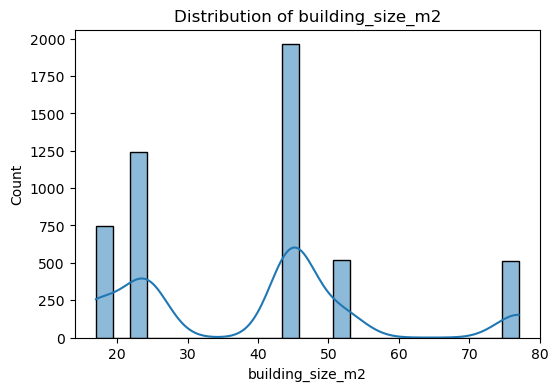

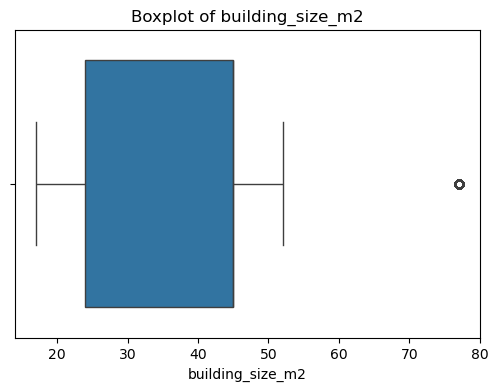

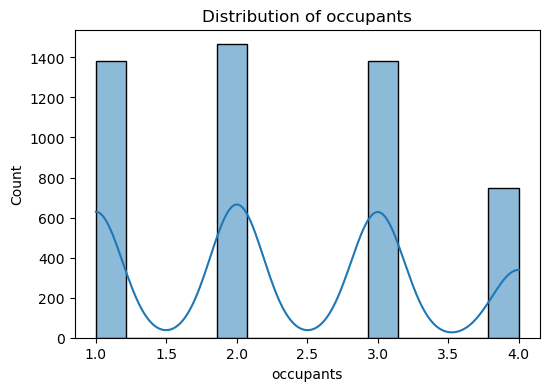

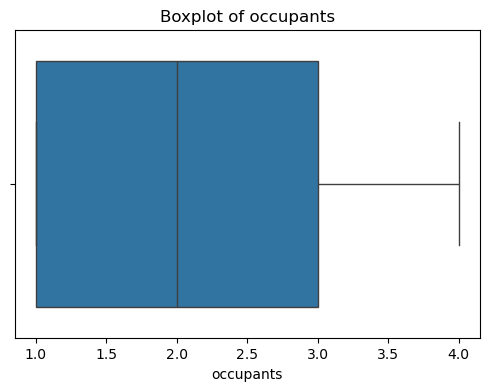

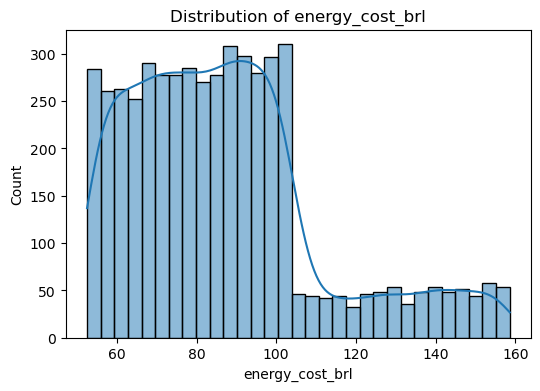

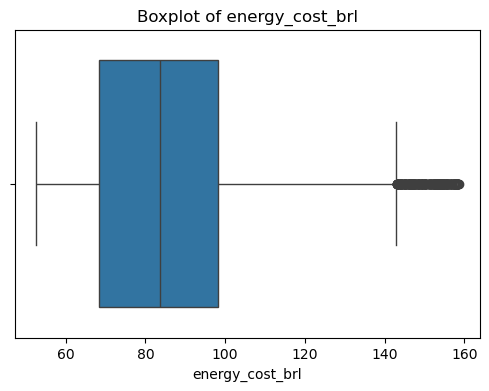

In [13]:
# Let's view distribution of numerical variables along with boxplots
num_energy = energy.select_dtypes(include=['int64', 'float64']).columns

for col in num_energy:
    plt.figure(figsize=(6,4))
    sns.histplot(energy[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=energy[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# Descriptions of histograms and boxplots

# Histograms:
# building size: values are spread out with majority of customers living in building sizes between 40-50 m^2
# occupants: most customers have 2 occupants followed by 1 or 3 occupants (equal counts)
# energy cost bill: Distribution is skewed to the right with majority of customers bill being between 60-100 dollars

# Boxplots:
# building size: Outliers are above the max value which suggests these customers live in very large houses
# occupants: No outliers appeared for occupants with the mean at 2.0 occupants.
# energy cost bill: There are alot of outliers above the max values suggesting that there is some underlying
# factor contributing to this such as how often lights/applicances stay on throughout the day, the house is very
# large which could result in have to use more energy and thus a higher energy bill.

# Further analysis would be needed to determine which values are actually outliers. Appropriate method to use
# would be mahalanobis distance. 

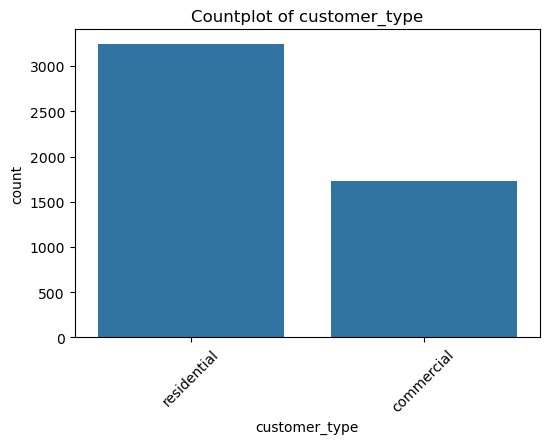

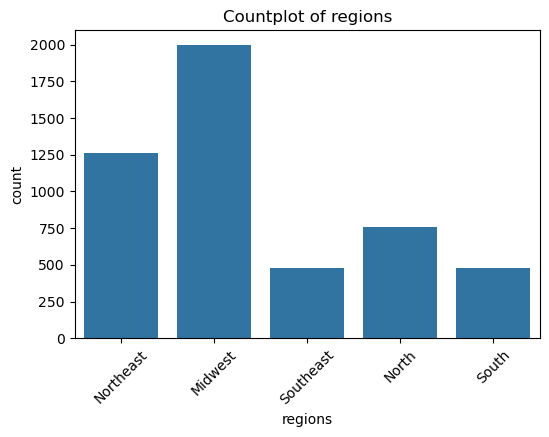

In [14]:
# View barplots of customer type and regions
cat_energy = energy[["customer_type", "regions"]]

for col in cat_energy:
    plt.figure(figsize=(6,4))
    sns.countplot(data=energy, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Histograms show that more customers live in residential homes than commercial.
# Most customers live in the midwest followed by the northeast parts of the country.

In [24]:
# Get frequency tables
print("Frequency table for Customer Type: \n")
print(energy['customer_type'].value_counts())

print("Frequency Table for Regions: \n")
print(energy['regions'].value_counts())

Frequency table for Customer Type: 

customer_type
residential    3261
commercial     1739
Name: count, dtype: int64
Frequency Table for Regions: 

regions
Midwest      2012
Northeast    1266
North         759
South         482
Southeast     481
Name: count, dtype: int64


In [14]:
# View frequency tables of customer_type and regions
energy_freq = pd.crosstab(index=[energy['customer_type'], energy['regions']], columns='count')
print(f"Frequency table for customer type and regions", energy_freq)

Frequency table for customer type and regions col_0                    count
customer_type regions         
commercial    Midwest      708
              North        273
              Northeast    433
              South        157
              Southeast    168
residential   Midwest     1304
              North        486
              Northeast    833
              South        325
              Southeast    313


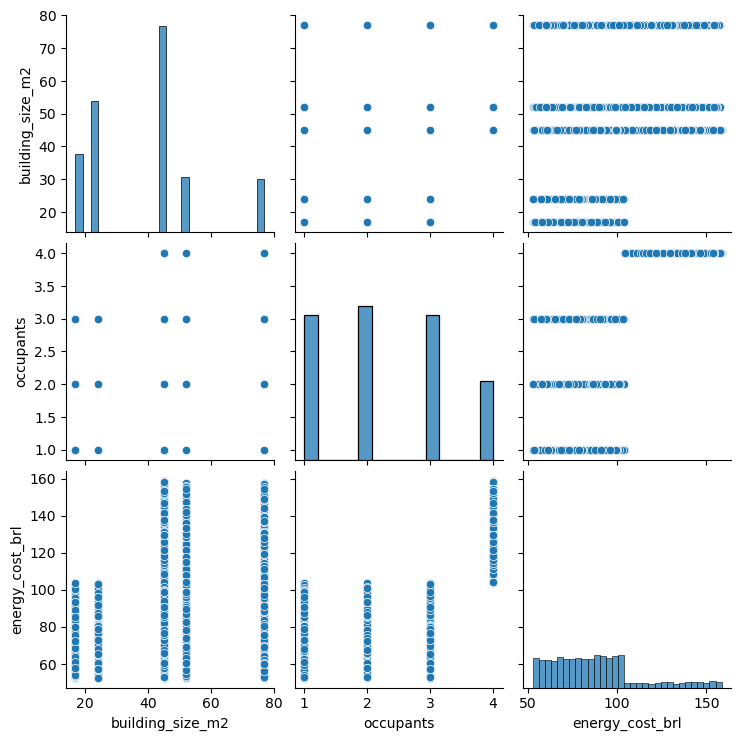

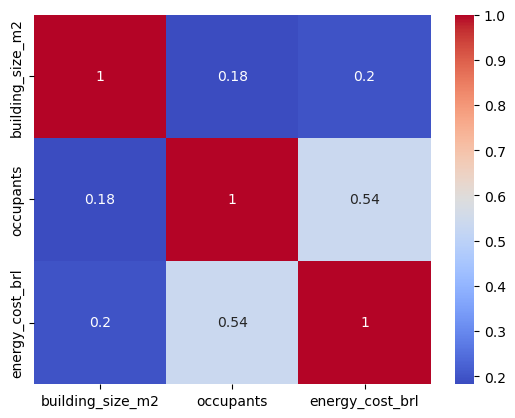

In [23]:
# Let's look at scatterplot matrix and heat map to see if the numerical variables are correlated with each other
sns.pairplot(energy[num_energy])
plt.show()

corr = energy[num_energy].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Occupants and Energy Cost have a moderate positive correlation of 0.54
# Everything else does not have a meaningful correlation.

In [15]:
# Define features and target
cat_features = ['customer_type', 'regions']
num_features = ['building_size_m2', 'occupants']
target = ['energy_cost_brl']

# One hot encoding for categorical features
energy_cat = pd.get_dummies(energy[cat_features], drop_first=True)

# Combine encode categorical features with numeric features
energy_num = energy[num_features].reset_index(drop=True)
X = pd.concat([energy_cat.reset_index(drop=True), energy_num], axis=1)

# Get target variable
y = energy[target]

In [16]:
# Let perform Linear regression on the data
# Target is the energy cost
# Predictors are customer type, regions, building size and occupants

# Use random seed
np.random.seed(42)


# Check shape of each
print("Shape:", X.shape, y.shape)
print("\nFirst 5 Rows of Features:\n", X.head())
print("\nFirst 5 Rows of Features:\n", y.head())

Shape: (4977, 7) (4977, 1)

First 5 Rows of Features:
    customer_type_residential  regions_North  regions_Northeast  regions_South  \
0                       True          False               True          False   
1                      False          False              False          False   
2                      False          False              False          False   
3                       True          False               True          False   
4                       True          False              False          False   

   regions_Southeast  building_size_m2  occupants  
0              False                24          2  
1              False                24          1  
2               True                24          1  
3              False                45          4  
4               True                45          4  

First 5 Rows of Features:
    energy_cost_brl
0            64.51
1            55.26
2            74.54
3           147.06
4           143.06


In [17]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 3483, Testing samples: 1494


In [18]:
# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make Predictions
y_pred_train= model.predict(X_train)
y_pred_test = model.predict(X_test)

In [25]:
# Lets look at adding predictions to training set and testing set to see how they compare
# first training data with predictions
train_df = X_train.copy()
train_df['Actual Energy Bill'] = y_train
train_df['Predicted Energy Bill'] = y_pred_train

In [38]:
# View first 20 rows
train_df.head(21)

,customer_type_residential,regions_North,regions_Northeast,regions_South,regions_Southeast,building_size_m2,occupants,Actual Energy Bill,Predicted Energy Bill
1840,True,False,False,True,False,17,1,74.49,68.004409
2115,True,False,False,True,False,17,2,79.30,80.041407
4437,False,False,True,False,False,45,2,84.10,84.000618
1146,False,False,False,False,False,45,1,94.73,70.976527
2486,True,False,False,False,False,24,1,78.22,68.225703
44,True,False,False,False,False,45,4,126.84,107.430098
2154,True,False,True,False,False,45,4,155.86,108.417191
1526,True,True,False,False,False,17,3,96.26,92.126480
4855,True,False,False,False,False,52,2,91.66,84.387237
1378,True,False,False,True,False,24,3,65.31,93.109538


In [39]:
# Lets do for testing data
test_df = X_test.copy()
test_df['Actual Energy Bill'] = y_test
test_df['Predicted Energy Bill'] = y_pred_test


In [40]:
# view first 20 rows
test_df.head(21)

,customer_type_residential,regions_North,regions_Northeast,regions_South,regions_Southeast,building_size_m2,occupants,Actual Energy Bill,Predicted Energy Bill
1501,True,True,False,False,False,52,2,78.68,85.245151
2586,True,False,False,False,False,24,2,94.01,80.262701
2653,True,False,False,False,True,45,2,92.81,85.542876
1055,True,False,False,False,False,24,2,68.22,80.262701
705,False,False,True,False,False,45,4,146.61,108.074614
106,True,False,True,False,False,24,3,71.59,93.286792
589,True,False,False,False,False,17,2,63.81,79.231567
2468,True,False,False,False,False,45,4,106.06,107.430098
2413,True,False,False,False,True,77,3,93.99,102.293628
1600,True,False,False,False,False,24,2,92.29,80.262701


In [41]:
# Let's Look at model performance for training and testing sets
# testing set would be ideal since the training set can make performance look better than it really is

# training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Testing Set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nModel Performance:")
print(f"Training MSE: {mse_train:.2f}, R2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R2: {r2_test:.2f}")


Model Performance:
Training MSE: 423.56, R2: 0.29
Testing MSE: 404.09, R2: 0.31


In [ ]:
# Both the train and test sets have high MSE(mean-squared error's)
# R2 for training set is 0.29 meaning that the model explains 29% of the variance in the training set

# R2 for test set is 0.31 meaning that the model explains 31% of the variance in the unseen test set

# Model overall explains 29% to 31% of the variance in the dependent variable.

# Since the R2 scores are close this means that the model is not overfit however it has weak predictive 
# capability 

In [43]:
# Look at the coefficients of the model
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_.ravel()
})

print("\nRegression Coefficients:")
print(coef_df)

# Intercept
print("\nIntercept:", model.intercept_)




Regression Coefficients:
                     Feature  Coefficient
0  customer_type_residential     0.342578
1              regions_North     0.857914
2          regions_Northeast     0.987093
3              regions_South     0.809839
4          regions_Southeast     2.186773
5           building_size_m2     0.147305
6                  occupants    12.036998

Intercept: [52.31081209]


In [ ]:
# Our Linear Regression Equation for Predicted Energy Bill is
# y = 52.31 + 0.34*customer_type_residential + 0.86*regions_North + 0.99*regions_Northeast
# + 0.81*regions_South + 2.19*regions_Southeast + 0.15*building_size_m2 + 12.04*occupants

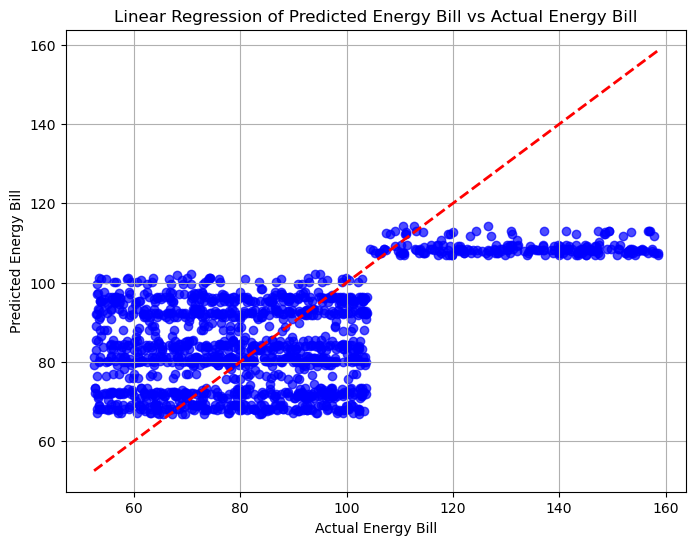

In [32]:
# Visualize Predictions vs Actual based on Testing Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Energy Bill")
plt.ylabel("Predicted Energy Bill")
plt.title("Linear Regression of Predicted Energy Bill vs Actual Energy Bill")
plt.grid(True)
plt.show()

In [ ]:
# Can look further into the statisical relationships and model diagnostics by using statsmodel linear regression
# Here the focus was just on exploring the data and prediction.